In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from sam_sat import *
from utils import plt2D

sigma = 5.670367e-8

f = xr.open_dataset("All_2014_NCEP_1stprcesd_gridded.nc").load()
f.close()
f = f.where(f.CTRC != -999.)

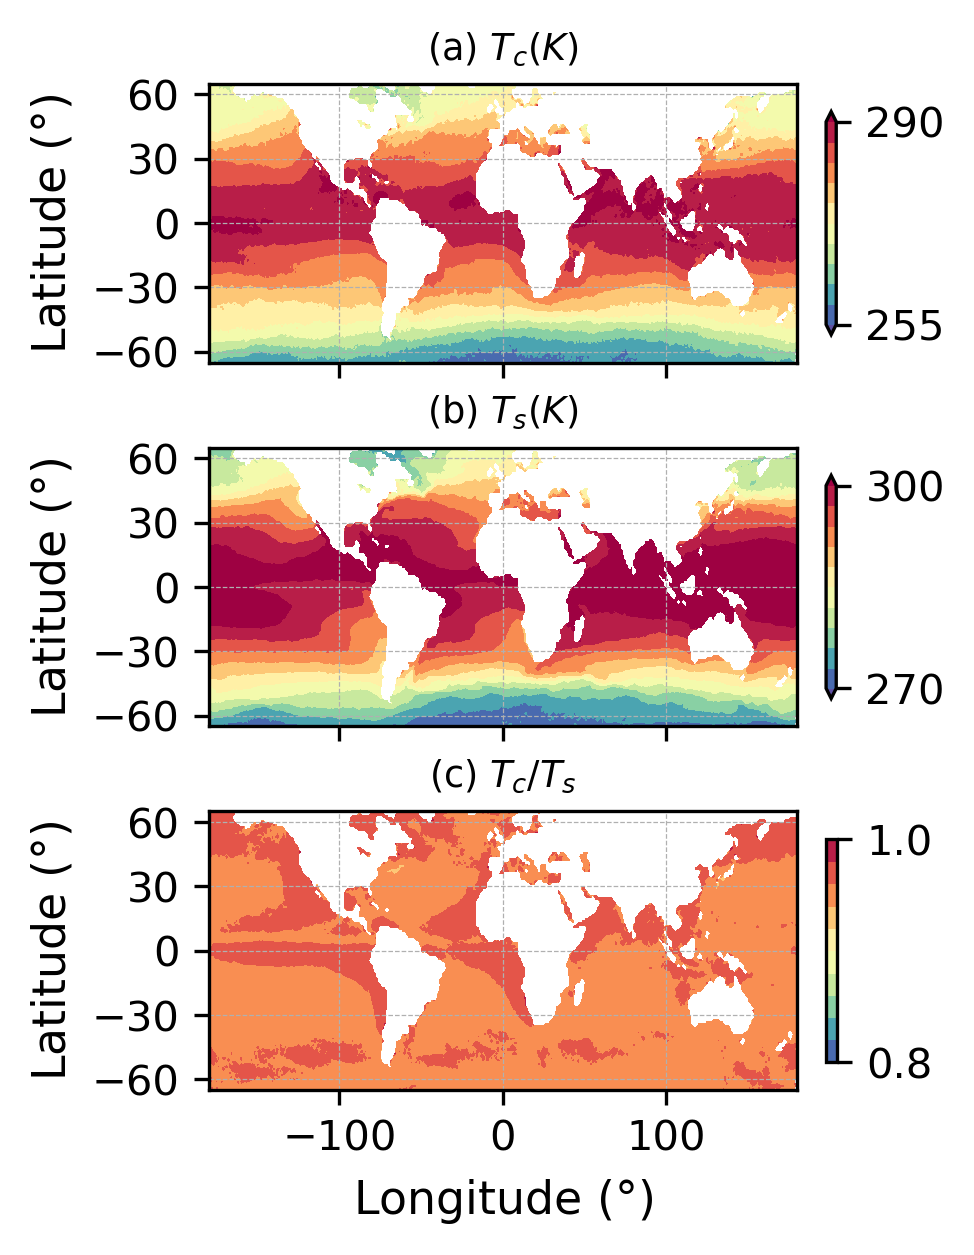

In [13]:
myfontsize = 11

fig, axs = plt.subplots(3,1,figsize=[8/2.54, 10/2.54],
                        sharex = True, sharey = True,
                        dpi = 300)

plt.tight_layout()

oax = plt2D(fig, axs[0], f.Longitude,f.Latitude, f.CTT + 273.15, '(a) $T_c (K)$', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(255, 290, num=11), 
            ylabel = True)

oax = plt2D(fig, axs[1], f.Longitude,f.Latitude, f.SST, '(b) $T_s (K)$', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(270, 300, num=11), 
            ylabel = True)

oax = plt2D(fig, axs[2], f.Longitude,f.Latitude, (f.CTT + 273.15)/f.SST, '(c) $T_c/T_s$', mycmap=cm.Spectral_r, 
      mylevels=np.linspace(0.8, 1, num=11), extend = 'neither', 
            ylabel = True, xlabel  =True)

fig.savefig('Fig3_Tc_Ts_spatial_pattern.png', dpi=fig.dpi, bbox_inches='tight')